In [4]:
import re

# Path to your .out file
file_path = 'slurm-20933478.out'

# Read the contents of the file
with open(file_path, 'r') as file:
    output = file.read()

def clean_string(s):
    # Remove backspace characters and anything that's not a digit, period, or minus sign
    return re.sub(r'[\x08]|[^0-9.-]', '', s)

# Regular expressions for batch-level data
batch_pattern = re.compile(r'(\d+)/\d+ \[.*?\] - ETA: .*? - loss: (.*?) - accuracy: (.*?)\s')

# Find all matches in the output
batch_data = batch_pattern.findall(output)

batch_results = [{'batch': int(batch), 
                  'loss': float(clean_string(loss)), 
                  'accuracy': float(clean_string(accuracy))}
                 for batch, loss, accuracy in batch_data]


In [8]:
batch_results[:5]

[{'batch': 1, 'loss': 0.6934, 'accuracy': 0.1719},
 {'batch': 2, 'loss': 0.6913, 'accuracy': 0.4922},
 {'batch': 3, 'loss': 0.6891, 'accuracy': 0.5938},
 {'batch': 4, 'loss': 0.687, 'accuracy': 0.6367},
 {'batch': 5, 'loss': 0.6835, 'accuracy': 0.6781}]

In [10]:
# Regular expressions for epoch summary data
epoch_pattern = re.compile(r'\d+/(\d+) \[=+\] - \d+s \d+s/step - loss: (.*?) - accuracy: (.*?) - val_loss: (.*?) - val_accuracy: (.*?)\s')

# Find all matches in the output
epoch_data = epoch_pattern.findall(output)

epoch_results = []

for i, (batches, loss, accuracy, val_loss, val_accuracy) in enumerate(epoch_data, start=1):
    epoch_results.append({
        'epoch': i,  # Manually assign epoch numbers starting from 1
        'loss': float(clean_string(loss)),
        'accuracy': float(clean_string(accuracy)),
        'val_loss': float(clean_string(val_loss)),
        'val_accuracy': float(clean_string(val_accuracy))
    })



In [11]:
epoch_results[:5]

[{'epoch': 1,
  'loss': 0.4132,
  'accuracy': 0.8365,
  'val_loss': 0.0745,
  'val_accuracy': 0.9849},
 {'epoch': 2,
  'loss': 0.4263,
  'accuracy': 0.8509,
  'val_loss': 0.4795,
  'val_accuracy': 0.8149},
 {'epoch': 3,
  'loss': 0.4953,
  'accuracy': 0.8092,
  'val_loss': 0.4788,
  'val_accuracy': 0.8149},
 {'epoch': 4,
  'loss': 0.4883,
  'accuracy': 0.8094,
  'val_loss': 0.4813,
  'val_accuracy': 0.8149},
 {'epoch': 5,
  'loss': 0.4869,
  'accuracy': 0.8094,
  'val_loss': 0.4787,
  'val_accuracy': 0.8149}]

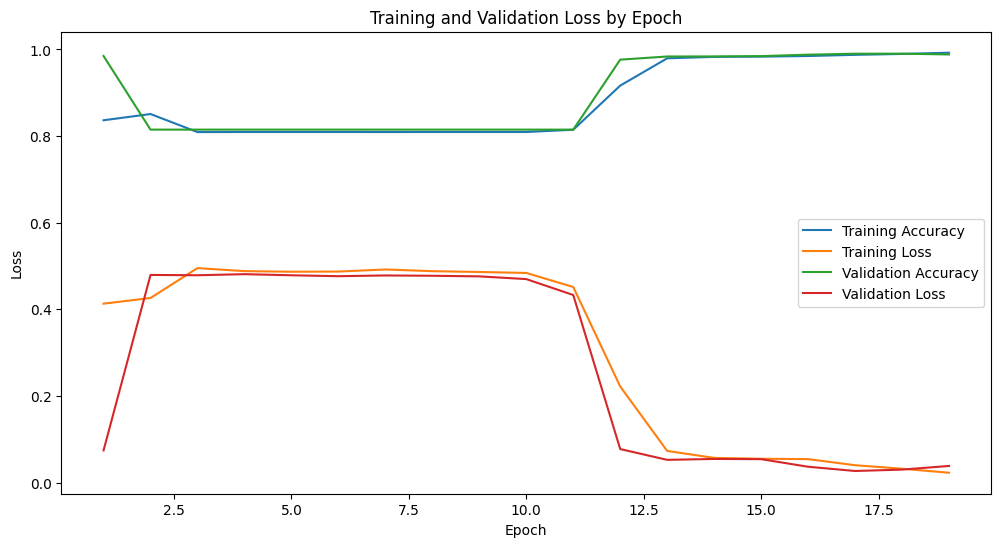

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert to DataFrame
epoch_df = pd.DataFrame(epoch_results)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(epoch_df['epoch'], epoch_df['accuracy'], label='Training Accuracy')
plt.plot(epoch_df['epoch'], epoch_df['loss'], label='Training Loss')
plt.plot(epoch_df['epoch'], epoch_df['val_accuracy'], label='Validation Accuracy')
plt.plot(epoch_df['epoch'], epoch_df['val_loss'], label='Validation Loss')

plt.title('Training and Validation Loss by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:
import os
import pandas as pd

directory = './embeddings_2'

# Initialize a list to hold file information
files_info = []

# Loop through each file in the directory
for filename in os.listdir(directory):
    # Get the full path to the file
    file_path = os.path.join(directory, filename)
    
    # Ensure it's a file
    if os.path.isfile(file_path):
        # Get the size of the file in bytes
        size_bytes = os.path.getsize(file_path)
        
        # Append the file name and size to the list
        files_info.append({'File Name': filename, 'Size (Bytes)': size_bytes})

# Convert the list of dictionaries to a DataFrame
df_files = pd.DataFrame(files_info)

# df_files.sort_values(by='File Name', ascending=True, inplace=True)

df_files['Size (MB)'] = df_files['Size (Bytes)'] // (1024 * 1024)

# Display the table
print(df_files)



                              File Name  Size (Bytes)  Size (MB)
0                         12hack3_2.csv       1891402          1
1      8webcam932_novideo_load_ip12.csv      17230526         16
2                   4Lab_cam_fw16_2.csv     549086766        523
3                   6Lab_cam_fw17_3.csv     567180617        540
4                   5Lab_cam_fw16_3.csv     564636988        538
5   10webcam5020_novideo_hack_ip134.csv       4060667          3
6    9webcam5020_novideo_load_ip134.csv     572950879        546
7      3txt_sample10_trans_enc_utf8.csv     822810663        784
8             7attacked_932_loading.csv     576806089        550
9       1txt_sample5clean_enc_ip159.csv     914439129        872
10      2txt_sample9_trans_enc_utf8.csv    1595359547       1521
11    11webcam932_novideo_hack_ip12.csv       1169306          1
